In [22]:
import sqlite3, matplotlib.pyplot as plt, pandas as pd,base64, io, numpy as np
from ipywidgets import interact
%matplotlib inline
connection = sqlite3.connect('database.db')
pd.set_option('display.max_rows', 500)

def display_image(row,column):
    decoded_image = io.BytesIO(base64.b64decode(row[column]))
    img = plt.imread(decoded_image, format='png')
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f"{row['architecture']} ({row['configuration_id']})", fontsize=20, fontweight='bold')
    plt.axis('off')
    plt.show()

## Show configurations

In [23]:
df = pd.read_sql_query("SELECT * FROM configuration where id < 15;", connection)
df

,id,transfer_learning,freeze_layers,balance_classes,segmentation,data_augmentation,normalization,custom_optimizer,callback
0,1,True,True,True,True,True,None,True,False
1,2,True,True,True,False,False,StandardScaler,False,False
2,3,False,False,False,False,True,None,False,False
3,4,False,False,False,False,False,None,False,False
4,5,False,False,True,False,False,None,False,False
5,6,False,False,False,True,False,None,False,False
6,7,True,True,False,False,False,None,False,False
7,8,True,True,False,False,True,None,False,False
8,9,True,True,True,False,True,None,False,False
9,10,True,True,True,False,True,MinMaxScaler,True,False


## Show melanoma statistics

In [24]:
df = pd.read_sql_query("""
    SELECT nb.name, nb.accuracy, nb.loss, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma' AND nb.configuration_id < 15
    ORDER BY met.recall DESC;
""", connection)
df

,name,accuracy,loss,precision,f1_score,roc_auc,recall,specificity
0,xceptionTransfBalOpt,0.186938,14.843204,0.207143,0.320442,0.783936,0.707317,0.757112
1,convnextDataAugmentationTransf,0.895391,13.903800,0.527559,0.536000,0.852431,0.544715,0.956236
2,convnextAll,0.000000,0.473472,0.471014,0.498084,0.918118,0.528455,0.946754
3,convnextTransfBal,0.716963,12.785114,0.278970,0.365169,0.834564,0.528455,0.877462
4,convnextTransfBalOpt,0.000000,0.562903,0.393939,0.451389,0.879727,0.528455,0.927061
5,convnextTransfBalSegOpt,0.000000,0.614947,0.333333,0.401294,0.870589,0.504065,0.909555
6,convnextDataAugTransfBalOpt,0.000000,0.495621,0.517241,0.502092,0.911382,0.487805,0.959154
7,resnetDataAugTransfBalMinMaxOpt,0.000000,0.780098,0.349693,0.398601,0.857893,0.463415,0.922684
8,resnetDataAugTransfBalOpt,0.153375,10.146336,0.236842,0.307692,0.813821,0.439024,0.873085
9,xceptionAll,0.088449,6.964890,0.263682,0.327160,0.830359,0.430894,0.892050


## Show notebooks statistics

In [25]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.accuracy, nb.loss, nb.auc, nb.recall, nb.precision
    FROM notebook AS nb
    WHERE nb.configuration_id < 15
    ORDER BY nb.configuration_id
""", connection)
df

,configuration_id,architecture,accuracy,loss,auc,recall,precision
0,1,ConvNeXt,0.000000,0.473472,0.981422,0.818608,0.851671
1,1,ResNetV2,0.281985,5.866637,0.865510,0.735609,0.736102
2,1,Xception,0.088449,6.964890,0.779053,0.568273,0.571332
3,2,ConvNeXt,0.570568,7.745555,0.878876,0.771084,0.771084
4,2,ResNetV2,0.858386,53.565731,0.820786,0.685408,0.685408
5,2,Xception,0.804552,24.090885,0.841543,0.713521,0.713521
6,3,ConvNeXt,0.000765,0.991117,0.944856,0.715529,0.747552
7,3,ResNetV2,0.000765,0.898044,0.946148,0.699464,0.765007
8,3,Xception,0.009466,1.188051,0.949269,0.694110,0.753086
9,4,ConvNeXt,0.000000,0.801396,0.950548,0.715529,0.788348


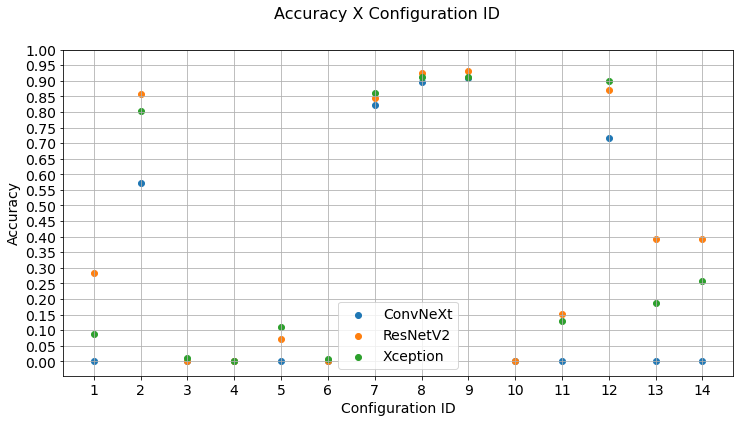

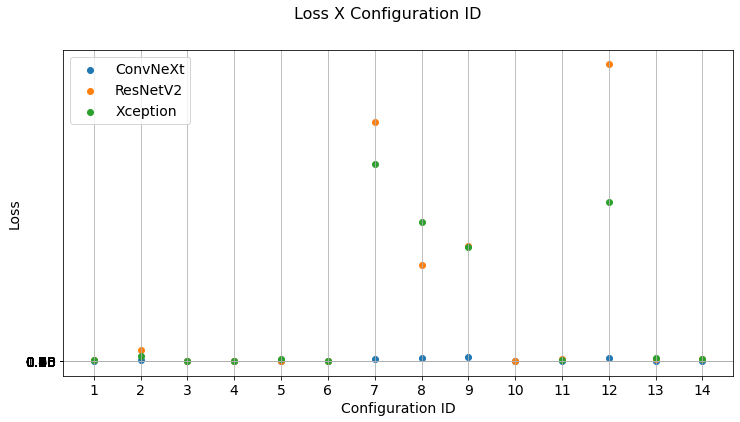

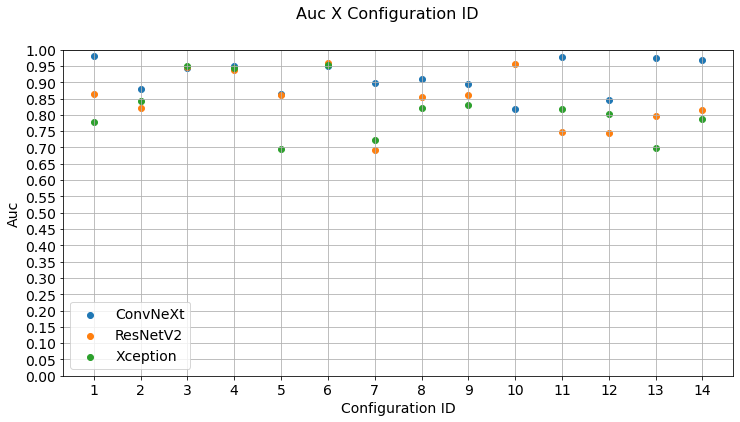

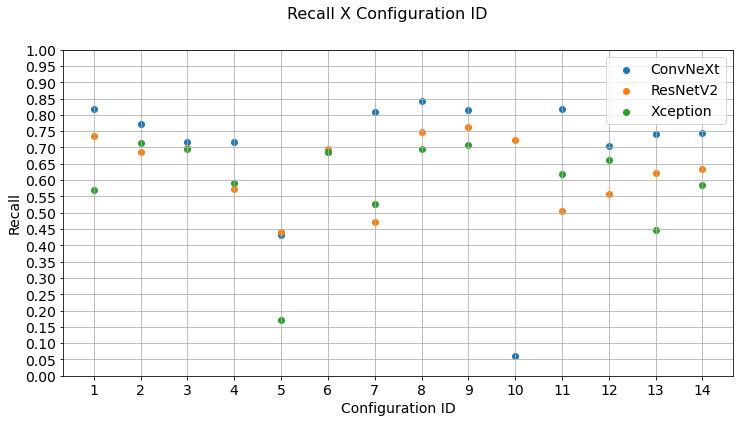

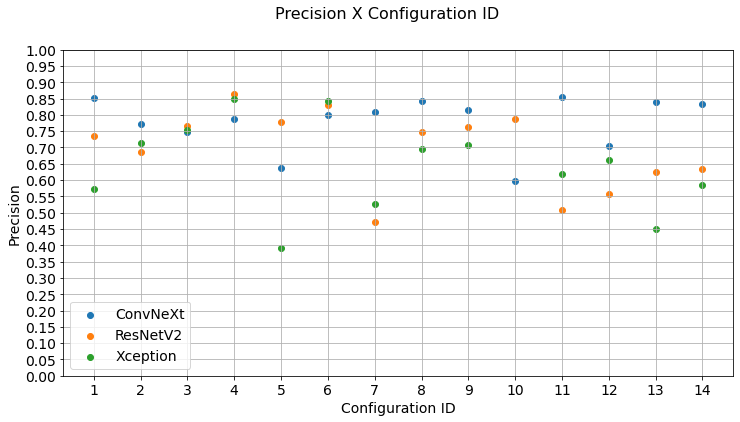

In [26]:
for i, metric in enumerate(['accuracy', 'loss', 'auc', 'recall', 'precision']):
    plt.figure(figsize=(12,6))
    plt.rc('font', size=14)
    for arch, group in df.groupby('architecture'):
        plt.scatter(group['configuration_id'], group[metric], label=arch, marker='o')
    plt.xticks(range(df['configuration_id'].min(), df['configuration_id'].max() + 1))
    plt.ylabel(metric.capitalize())
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.xlabel('Configuration ID')
    plt.legend(loc='best')
    plt.grid()
    plt.suptitle(''.join([metric.capitalize(),' X Configuration ID']), fontsize=16)
    plt.show()

## Verify notebooks with low loss

In [27]:
df = pd.read_sql_query("""
    SELECT n.name, n.loss, n.accuracy, n.auc, n.recall, n.precision, n.val_loss, n.val_accuracy, n.val_auc, n.val_recall, n.val_precision
    FROM notebook n
    WHERE n.accuracy > .1 AND n.loss < 15 AND n.configuration_id < 15
    ORDER BY val_loss;
""", connection)
df

,name,loss,accuracy,auc,recall,precision,val_loss,val_accuracy,val_auc,val_recall,val_precision
0,resnetAll,5.866637,0.281985,0.865510,0.735609,0.736102,5.299574,0.290878,0.869488,0.733601,0.733601
1,xceptionDataAugTransfBalOpt,5.839602,0.128036,0.816937,0.617805,0.619048,6.196511,0.143048,0.815546,0.629183,0.630872
2,convnextBalancedNormTransf,7.745555,0.570568,0.878876,0.771084,0.771084,7.552616,0.573915,0.888493,0.787149,0.787149
3,xceptionRawBalanced,9.368470,0.111589,0.695948,0.170013,0.391975,8.734912,0.121056,0.713995,0.190094,0.439628
4,resnetTransfBalSegOpt,9.479651,0.391471,0.813906,0.634538,0.635389,9.233140,0.425320,0.815995,0.647925,0.648794
5,xceptionTransfBalSegOpt,8.826569,0.256454,0.788219,0.583668,0.586416,9.818106,0.235035,0.770583,0.552878,0.552878
6,convnextTransf,9.860565,0.823580,0.898529,0.808568,0.809109,10.595829,0.836680,0.902256,0.820616,0.820616
7,resnetDataAugTransfBalOpt,10.146336,0.153375,0.748515,0.506693,0.509764,10.627501,0.143813,0.744632,0.503347,0.506739
8,resnetTransfBalOpt,11.414797,0.392522,0.797815,0.623159,0.623995,12.128283,0.388411,0.791191,0.598394,0.598394
9,convnextTransfBal,12.785114,0.716963,0.845576,0.704819,0.705291,13.470922,0.718876,0.838137,0.694779,0.694779


## Verify notebooks based on configuration

In [28]:
df = pd.read_sql_query("""
    SELECT n.id,n.name, n.loss, n.accuracy, n.auc, n.recall, n.precision, n.val_loss, n.val_accuracy, n.val_auc, n.val_recall, n.val_precision
    FROM notebook n
    WHERE n.configuration_id in (8,9,1);
""", connection)
df

,id,name,loss,accuracy,auc,recall,precision,val_loss,val_accuracy,val_auc,val_recall,val_precision
0,1,convnextAll,0.473472,0.000000,0.981422,0.818608,0.851671,0.514580,0.000000,0.977917,0.813922,0.853933
1,2,resnetAll,5.866637,0.281985,0.865510,0.735609,0.736102,5.299574,0.290878,0.869488,0.733601,0.733601
2,3,xceptionAll,6.964890,0.088449,0.779053,0.568273,0.571332,6.106883,0.108434,0.813210,0.603748,0.606999
3,22,convnextDataAugmentationTransf,13.903800,0.895391,0.910296,0.842704,0.842704,14.793124,0.895774,0.893324,0.805890,0.805890
4,23,resnetDataAugmentationTransf,478.226196,0.926085,0.853609,0.748996,0.748996,538.329834,0.917958,0.841294,0.726908,0.726908
5,24,xceptionDataAugmentationTransf,691.574402,0.910690,0.822454,0.695448,0.695448,741.883972,0.906674,0.813365,0.680054,0.680054
6,25,convnextDataAugmentationTransfBalanced,21.231993,0.909352,0.896011,0.815261,0.815261,20.930874,0.915089,0.898334,0.820616,0.820616
7,26,resnetDataAugmentationTransfBalanced,569.494934,0.929910,0.861363,0.761714,0.761714,666.657593,0.928858,0.858657,0.757697,0.757697
8,27,xceptionDataAugmentationTransfBalanced,564.250000,0.913463,0.829396,0.707497,0.707497,544.248718,0.911647,0.825078,0.700134,0.700134


## Verify xception and resnet notebooks

In [29]:
df = pd.read_sql_query("""
    SELECT n.name, n.loss, n.accuracy, n.auc, n.recall, n.precision, n.val_loss, n.val_accuracy, n.val_auc, n.val_recall, n.val_precision
    FROM notebook n
    WHERE n.architecture in ('ResNetV2', 'Xception') AND n.configuration_id < 15
    AND n.val_accuracy <> 0 AND n.val_precision > .5 AND n.val_recall > .5;
""", connection)
df

,name,loss,accuracy,auc,recall,precision,val_loss,val_accuracy,val_auc,val_recall,val_precision
0,resnetAll,5.866637,0.281985,0.865510,0.735609,0.736102,5.299574,0.290878,0.869488,0.733601,0.733601
1,xceptionAll,6.964890,0.088449,0.779053,0.568273,0.571332,6.106883,0.108434,0.813210,0.603748,0.606999
2,resnetBalancedNormTransf,53.565731,0.858386,0.820786,0.685408,0.685408,59.360420,0.865749,0.831463,0.702811,0.702811
3,xceptionBalancedNormTransf,24.090885,0.804552,0.841543,0.713521,0.713521,25.419273,0.803022,0.835561,0.708166,0.708166
4,resnetDataaugmentation,0.898044,0.000765,0.946148,0.699464,0.765007,0.834481,0.000574,0.948741,0.717537,0.790560
5,xceptionDataaugmentation,1.188051,0.009466,0.949269,0.694110,0.753086,0.881305,0.005928,0.950401,0.704150,0.770132
6,resNetRaw,0.861514,0.000765,0.938604,0.572959,0.865521,0.825477,0.001912,0.943341,0.585007,0.863636
7,xceptionRaw,0.845405,0.000478,0.943113,0.591031,0.848223,0.785567,0.000191,0.948079,0.610442,0.873563
8,xceptionSegmentation,0.753296,0.006120,0.951801,0.684739,0.842669,0.749381,0.005355,0.953201,0.677376,0.836364
9,xceptionTransf,975.918335,0.860585,0.723905,0.526774,0.526774,1024.374756,0.858864,0.719661,0.519411,0.519411


## Display accuracy graphs during training

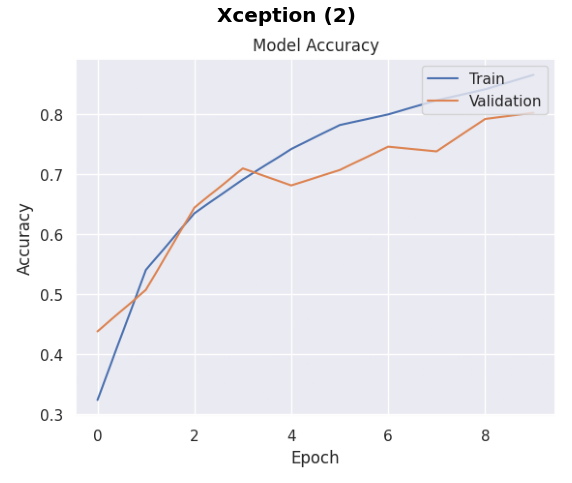

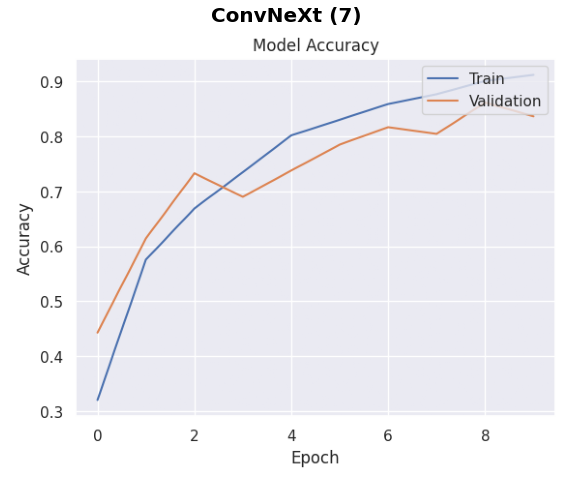

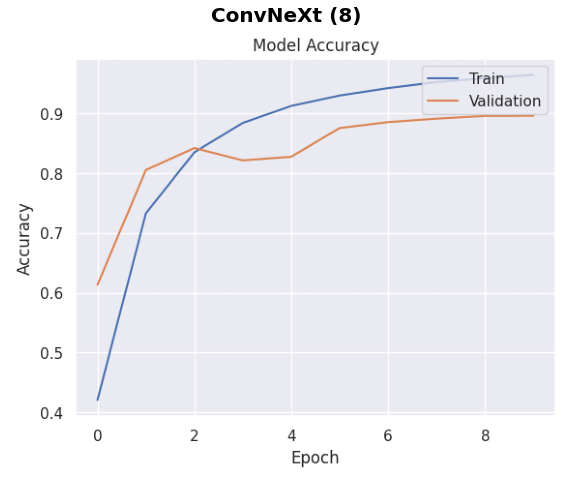

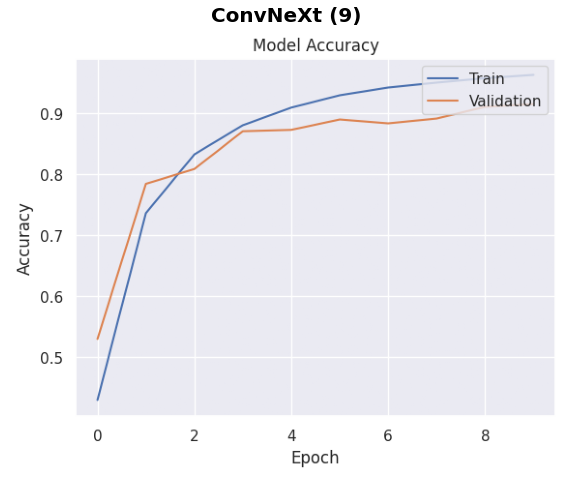

In [30]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.accuracy_epochs
    FROM notebook AS nb
    WHERE nb.id in (6,19,22,25)
""", connection)
for id, row in df.iterrows():
    display_image(row,'accuracy_epochs')

## Display losses graphs during training

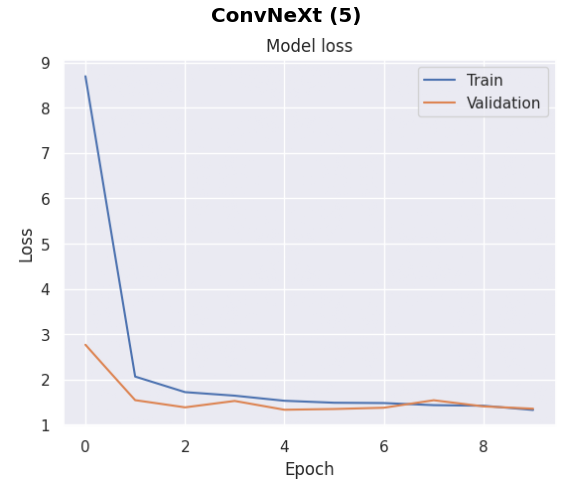

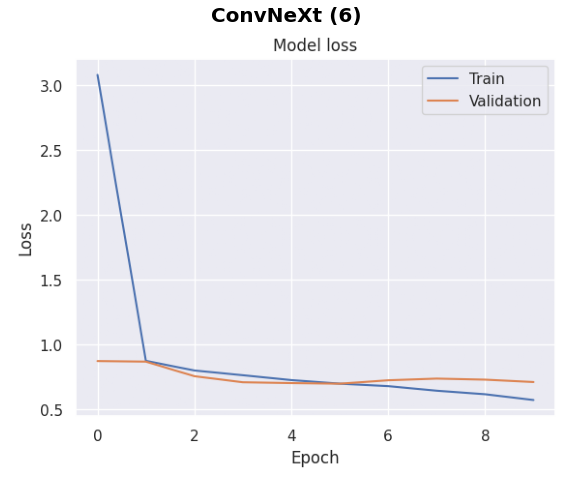

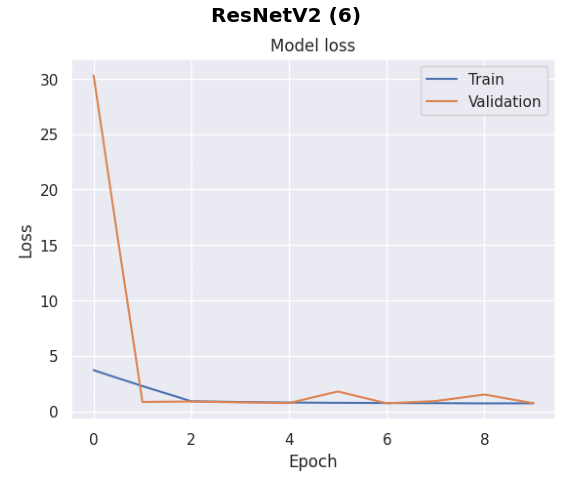

In [31]:
df = pd.read_sql_query("""
    SELECT nb.loss_epochs, nb.configuration_id, nb.architecture
    FROM notebook AS nb
    WHERE nb.id in (13,16,17)
""", connection)
for id, row in df.iterrows():
    display_image(row,'loss_epochs')

## Get best melanoma detections

In [32]:
df = pd.read_sql_query("""
    SELECT nb.name, nb.accuracy, nb.loss, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma' AND nb.recall > 0.5 AND met.precision > .5 AND met.f1_score > 0.5 AND nb.configuration_id < 15
    ORDER BY met.recall DESC;
""", connection)
df

,name,accuracy,loss,precision,f1_score,roc_auc,recall,specificity
0,convnextDataAugmentationTransf,0.895391,13.903800,0.527559,0.536000,0.852431,0.544715,0.956236
1,convnextDataAugTransfBalOpt,0.000000,0.495621,0.517241,0.502092,0.911382,0.487805,0.959154


## Get images from best melanoma detection

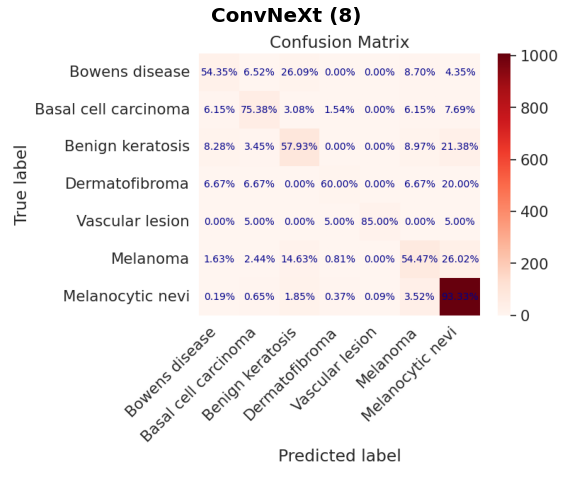

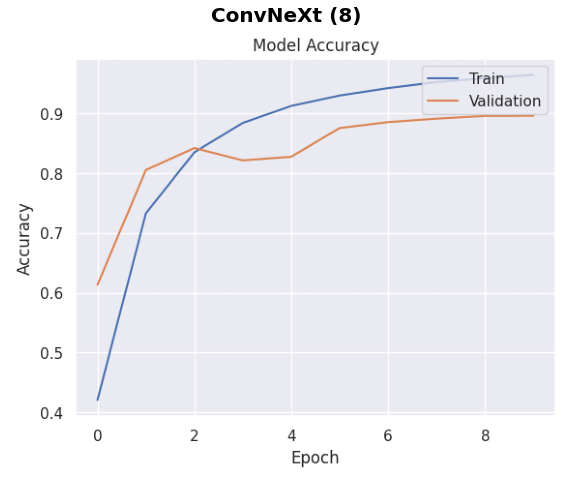

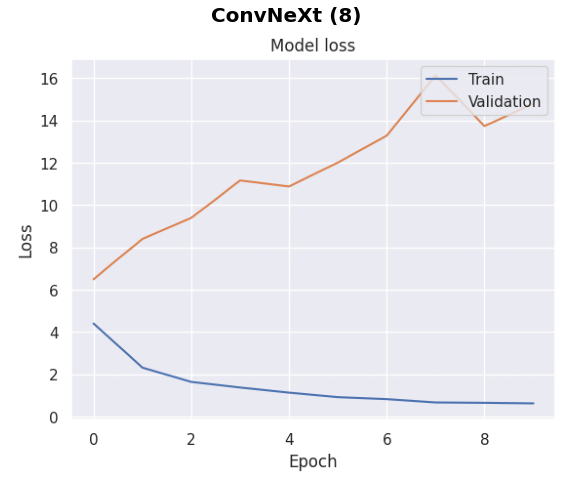

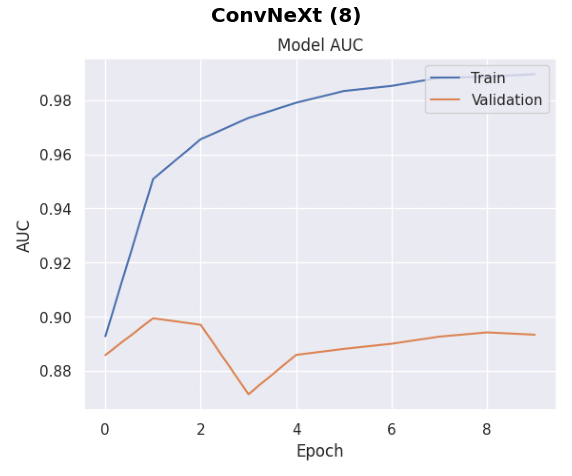

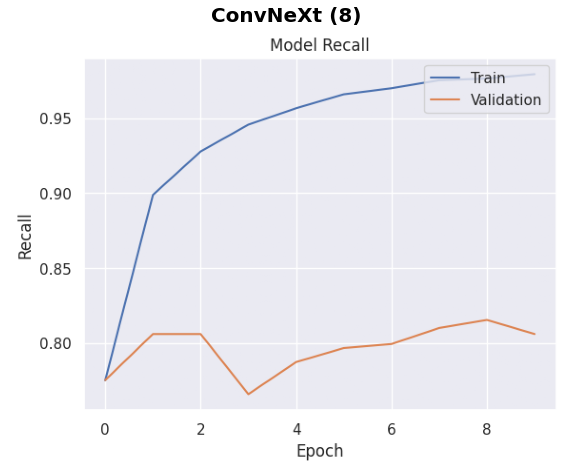

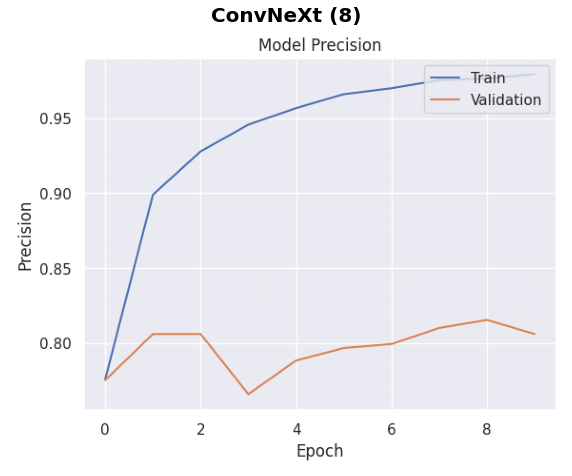

In [33]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.confusion_matrix, nb.accuracy_epochs, nb.loss_epochs, nb.auc_epochs, nb.recall_epochs, nb.precision_epochs
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma' AND nb.recall > 0.5 AND met.precision > .5 AND met.f1_score > 0.5 AND met.specificity AND nb.accuracy > 0 AND nb.configuration_id < 15
    ORDER BY met.recall DESC;
""", connection)
for id, row in df.iterrows():
    display_image(row,'confusion_matrix')
    display_image(row,'accuracy_epochs')
    display_image(row,'loss_epochs')
    display_image(row,'auc_epochs')
    display_image(row,'recall_epochs')
    display_image(row,'precision_epochs')

## Verify configurations

In [34]:
df = pd.read_sql_query("""
    SELECT n.confusion_matrix, n.accuracy_epochs, n.loss_epochs, n.auc_epochs, n.recall_epochs, n.precision_epochs
    FROM notebook n
    WHERE n.configuration_id in (8,9,1);
""", connection)
"""
print("Confusion Matrixes")
df['confusion_matrix'].apply(display_image)
print("Accuracies")
df['accuracy_epochs'].apply(display_image)
print("Losses")
df['loss_epochs'].apply(display_image)
print("AUCs")
df['auc_epochs'].apply(display_image)
print("Recalls")
df['recall_epochs'].apply(display_image)
print("Precisions")
df['precision_epochs'].apply(display_image)"""

'\nprint("Confusion Matrixes")\ndf[\'confusion_matrix\'].apply(display_image)\nprint("Accuracies")\ndf[\'accuracy_epochs\'].apply(display_image)\nprint("Losses")\ndf[\'loss_epochs\'].apply(display_image)\nprint("AUCs")\ndf[\'auc_epochs\'].apply(display_image)\nprint("Recalls")\ndf[\'recall_epochs\'].apply(display_image)\nprint("Precisions")\ndf[\'precision_epochs\'].apply(display_image)'

## Get statistics from best model performance

In [35]:
df = pd.read_sql_query("""
    SELECT met.type, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE nb.name = 'convnextDataAugmentationTransf'
    ORDER BY met.type
""", connection)
df

,type,precision,f1_score,roc_auc,recall,specificity
0,Basal_cell_carcinoma,0.710145,0.731343,0.926328,0.753846,0.986004
1,Benign_keratosis,0.617647,0.597865,0.867682,0.579310,0.961453
2,Bowens_disease,0.543478,0.543478,0.882266,0.543478,0.985497
3,Dermatofibroma,0.562500,0.580645,0.895831,0.600000,0.995267
4,Melanocytic_nevi,0.931608,0.932470,0.894331,0.933333,0.821256
5,Melanoma,0.527559,0.536000,0.852431,0.544715,0.956236
6,Vascular_lesion,0.944444,0.894737,0.924746,0.850000,0.999322


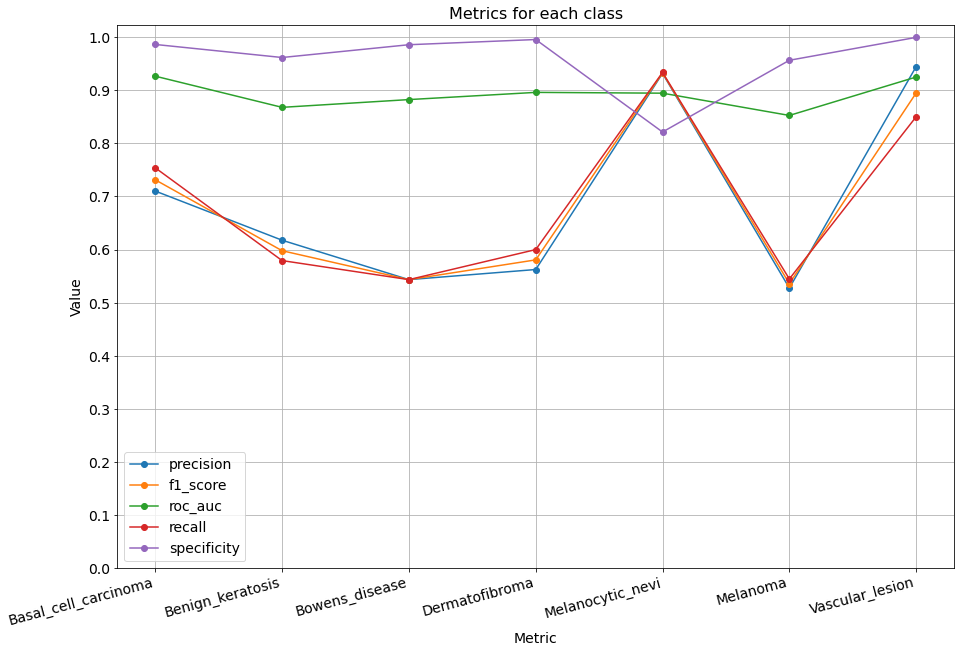

In [36]:
data = df[['type', 'precision', 'f1_score', 'roc_auc', 'recall', 'specificity']]

data.set_index('type', inplace=True)

data.plot(marker='o', figsize=(15, 10))
plt.rc('font', size=14)
plt.title('Metrics for each class', fontsize=16)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation = 15, ha = 'right')
plt.show()

In [37]:
df = pd.read_sql_query("""
    SELECT nb.configuration_id, nb.architecture, nb.accuracy, nb.loss, nb.auc, nb.recall, nb.precision
    FROM notebook AS nb
    WHERE nb.name = 'convnextDataAugmentationTransf'
""", connection)
df

,configuration_id,architecture,accuracy,loss,auc,recall,precision
0,8,ConvNeXt,0.895391,13.9038,0.910296,0.842704,0.842704


In [38]:
df = pd.read_sql_query("""
    SELECT c.transfer_learning, c.freeze_layers, c.balance_classes, c.segmentation, c.data_augmentation, c.normalization, c.custom_optimizer, c.callback
    FROM configuration c JOIN notebook nb
    ON c.id = nb.configuration_id
    WHERE nb.name = 'convnextDataAugmentationTransf'
""", connection)
df

,transfer_learning,freeze_layers,balance_classes,segmentation,data_augmentation,normalization,custom_optimizer,callback
0,True,True,False,False,True,None,False,False


## Melanoma Statistics

In [39]:
df = pd.read_sql_query("""
    SELECT nb.architecture, nb.configuration_id, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.type = 'Melanoma' AND nb.configuration_id < 15;
""", connection)
df

,architecture,configuration_id,precision,f1_score,roc_auc,recall,specificity
0,ConvNeXt,1,0.471014,0.498084,0.918118,0.528455,0.946754
1,ResNetV2,1,0.304348,0.345070,0.827368,0.398374,0.918308
2,Xception,1,0.263682,0.327160,0.830359,0.430894,0.892050
3,ConvNeXt,2,0.435484,0.291892,0.842412,0.219512,0.974471
4,ResNetV2,2,0.207627,0.272981,0.707714,0.398374,0.863603
5,Xception,2,0.261538,0.180851,0.679971,0.138211,0.964989
6,ConvNeXt,3,0.280899,0.332226,0.834641,0.406504,0.906637
7,ResNetV2,3,0.403846,0.240000,0.833111,0.170732,0.977389
8,Xception,3,0.363636,0.390977,0.853365,0.422764,0.933625
9,ConvNeXt,4,0.545455,0.165517,0.810547,0.097561,0.992706


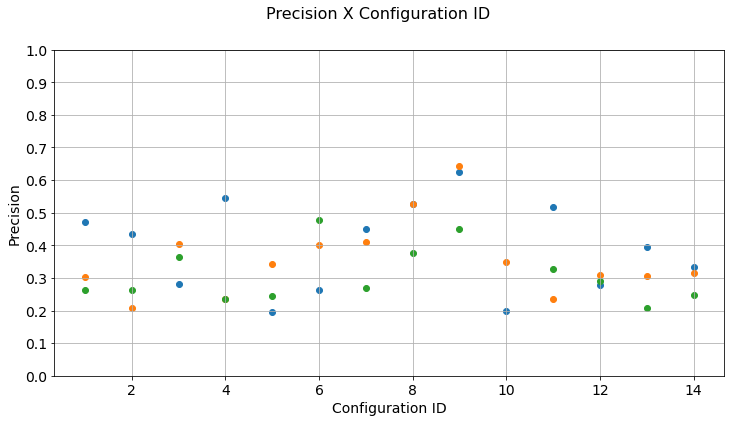

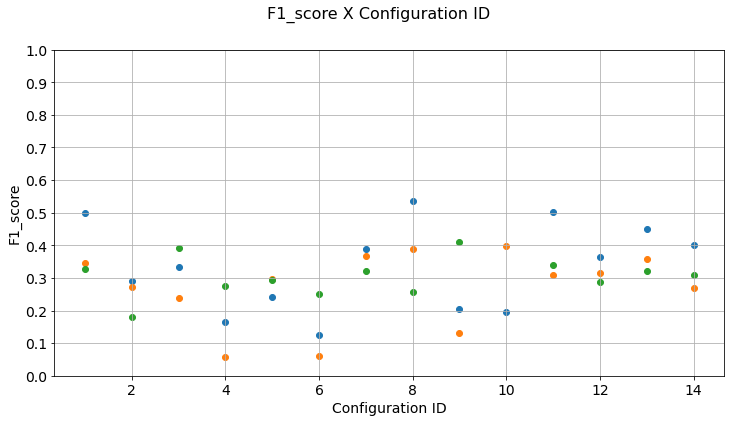

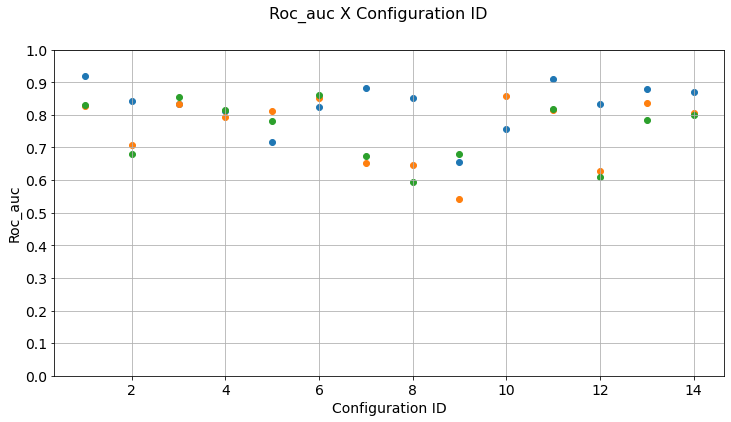

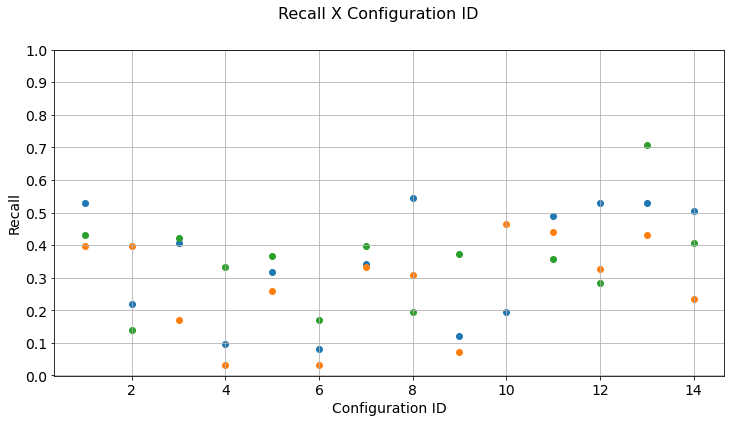

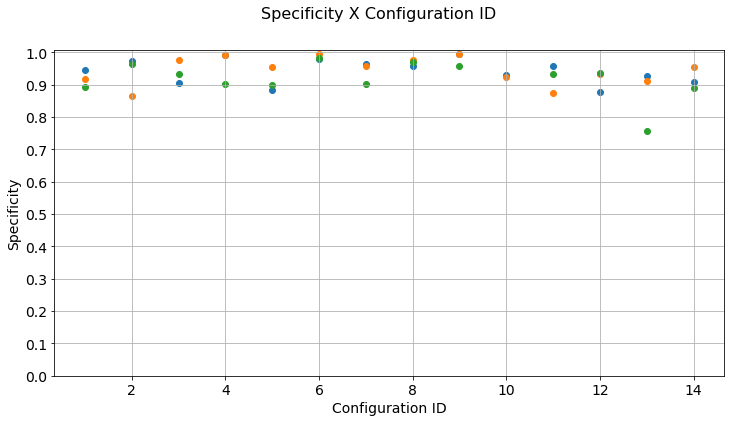

In [40]:
for i, metric in enumerate(['precision', 'f1_score', 'roc_auc', 'recall', 'specificity']):
    plt.figure(figsize=(12,6))
    plt.rc('font', size=14)
    for arch, group in df.groupby('architecture'):
        plt.scatter(group['configuration_id'], group[metric], label=arch, marker='o')
    plt.ylabel(metric.capitalize())
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('Configuration ID')
    plt.grid()
    plt.suptitle(''.join([metric.capitalize(),' X Configuration ID']), fontsize=16)
    plt.show()

## Class count of notebooks with >50% in all class metrics and accuracy

In [41]:
df = pd.read_sql_query("""
    SELECT nb.architecture || ' (' || nb.configuration_id ||')' as name, count(*) as total
    FROM metrics AS met JOIN notebook AS nb
    ON met.notebook_id = nb.id
    WHERE met.precision > .5 and met.f1_score > .5 and met.roc_auc > .5 and met.specificity > .5 and met.recall > .5 and nb.accuracy > .5
    group by nb.name
    ORDER BY count(*) DESC;
""", connection)
df

,name,total
0,ConvNeXt (8),7
1,ConvNeXt (7),4
2,ConvNeXt (9),4
3,ConvNeXt (20),3
4,Xception (16),2
5,ResNetV2 (19),2
6,ResNetV2 (16),2
7,ConvNeXt (12),2
8,ConvNeXt (19),2
9,ConvNeXt (17),2


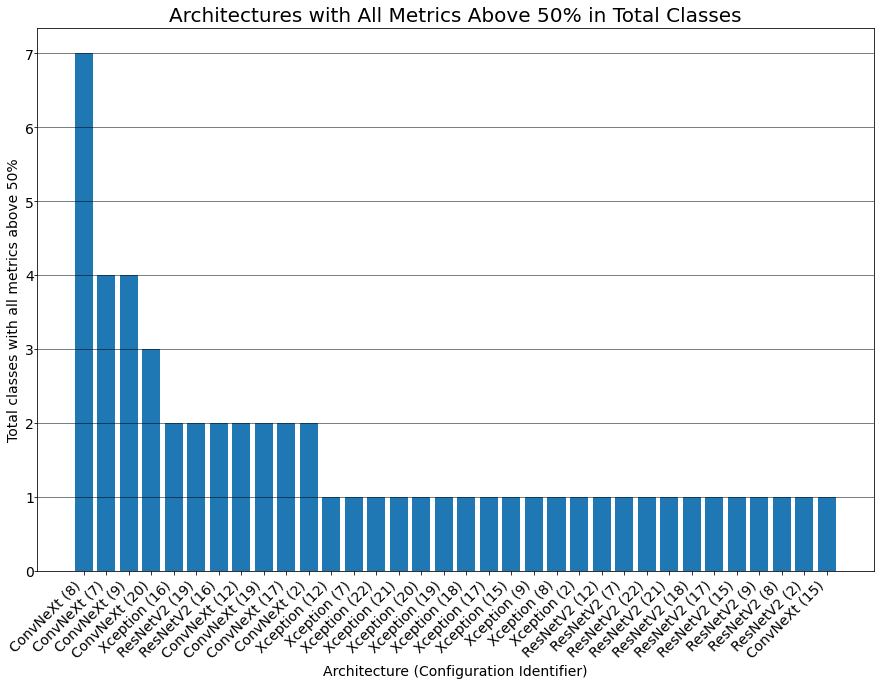

In [42]:
plt.figure(figsize=(15,10))
plt.bar(df['name'],df['total'])
plt.rc('font', size=16)
plt.title('Architectures with All Metrics Above 50% in Total Classes', fontsize=20)
plt.ylabel('Total classes with all metrics above 50%')
plt.xlabel('Architecture (Configuration Identifier)')
plt.xticks(rotation=45, ha='right')
plt.yticks(ha='center')
plt.grid(axis='y', linewidth=0.5, color='black')

plt.show()

## Counts

### Number of rows per table

In [43]:
def query(table = 'notebook'):
    df = pd.read_sql_query("""
        SELECT count(*) as total FROM """ + table, connection)
    return df
df = interact(query, table = ['notebook', 'metrics', 'configuration'])
df

interactive(children=(Dropdown(description='table', options=('notebook', 'metrics', 'configuration'), value='n…

<function __main__.query(table='notebook')>

### Number of models with metric (notebook) above 50%

In [44]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT count(*) as total
        FROM notebook AS nb
        WHERE nb.""" + metric + """ > .5
    """, connection)
    return df
df = interact(query, metric = ['accuracy', 'precision', 'recall', 'auc', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])
df

interactive(children=(Dropdown(description='metric', options=('accuracy', 'precision', 'recall', 'auc', 'val_a…

<function __main__.query(metric='accuracy')>

### Number of models with metric (class) above 50%

In [45]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT count(*) as total
        FROM metrics as met
        WHERE met.""" + metric + """ > .5
    """, connection)
    return df
df = interact(query, metric = ['f1_score', 'precision', 'recall', 'roc_auc', 'specificity'])
df

interactive(children=(Dropdown(description='metric', options=('f1_score', 'precision', 'recall', 'roc_auc', 's…

<function __main__.query(metric='accuracy')>

## Higher metrics

### Notebook
#### Max metric

In [46]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, nb.loss, nb.accuracy, nb.precision, nb.recall, nb.auc, nb.val_loss, nb.val_accuracy, nb.val_precision, nb.val_recall, nb.val_auc
        FROM notebook AS nb
        WHERE nb.""" + metric + """ = (SELECT MAX(nb.""" + metric + """) FROM notebook as nb)
    """, connection)
    return df
df = interact(query, metric = ['accuracy', 'precision', 'recall', 'auc', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])
df

interactive(children=(Dropdown(description='metric', options=('accuracy', 'precision', 'recall', 'auc', 'val_a…

<function __main__.query(metric='accuracy')>

#### Ordering by metric

In [47]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, nb.loss, nb.accuracy, nb.precision, nb.recall, nb.auc, nb.val_loss, nb.val_accuracy, nb.val_precision, nb.val_recall, nb.val_auc
        FROM notebook AS nb
        ORDER BY nb.""" + metric + " DESC", connection)
    return df
df = interact(query, metric = ['accuracy', 'precision', 'recall', 'auc', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])
df

interactive(children=(Dropdown(description='metric', options=('accuracy', 'precision', 'recall', 'auc', 'val_a…

<function __main__.query(metric='accuracy')>

### Class
#### Max metric

In [48]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, met.type, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
        FROM metrics as met JOIN notebook AS nb
        ON met.notebook_id = nb.id
        WHERE met.""" + metric + """ = (SELECT MAX(met.""" + metric + """) FROM metrics as met)
    """, connection)
    return df
df = interact(query, metric = ['f1_score', 'precision', 'recall', 'roc_auc', 'specificity'])
df

interactive(children=(Dropdown(description='metric', options=('f1_score', 'precision', 'recall', 'roc_auc', 's…

<function __main__.query(metric='accuracy')>

#### Max melanoma metric

In [49]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, met.type, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
        FROM metrics as met JOIN notebook AS nb
        ON met.notebook_id = nb.id
        WHERE met.""" + metric + """ = (SELECT MAX(met.""" + metric + """) FROM metrics as met WHERE met.type = 'Melanoma')
    """, connection)
    return df
df = interact(query, metric = ['f1_score', 'precision', 'recall', 'roc_auc', 'specificity'])
df

interactive(children=(Dropdown(description='metric', options=('f1_score', 'precision', 'recall', 'roc_auc', 's…

<function __main__.query(metric='accuracy')>

#### Ordering by metric

In [50]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, met.type, met.precision, met.f1_score, met.roc_auc, met.recall, met.specificity
        FROM metrics as met JOIN notebook AS nb
        ON met.notebook_id = nb.id
        ORDER BY met.""" + metric + " DESC", connection)
    return df
df = interact(query, metric = ['f1_score', 'precision', 'recall', 'roc_auc', 'specificity'])
df

interactive(children=(Dropdown(description='metric', options=('f1_score', 'precision', 'recall', 'roc_auc', 's…

<function __main__.query(metric='accuracy')>

### Loss
#### Min loss

In [51]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, nb.loss, nb.accuracy, nb.precision, nb.recall, nb.auc, nb.val_loss, nb.val_accuracy, nb.val_precision, nb.val_recall, nb.val_auc
        FROM notebook AS nb
        WHERE nb.""" + metric + """ = (SELECT MIN(nb.""" + metric + """) FROM notebook as nb)
    """, connection)
    return df
df = interact(query, metric = ['loss', 'val_loss'])
df

interactive(children=(Dropdown(description='metric', options=('loss', 'val_loss'), value='loss'), Output()), _…

<function __main__.query(metric='accuracy')>

#### Ordering by lower loss

In [52]:
def query(metric = 'accuracy'):
    df = pd.read_sql_query("""
        SELECT nb.configuration_id, nb.architecture, nb.loss, nb.accuracy, nb.precision, nb.recall, nb.auc, nb.val_loss, nb.val_accuracy, nb.val_precision, nb.val_recall, nb.val_auc
        FROM notebook AS nb
        ORDER BY nb.""" + metric, connection)
    return df
df = interact(query, metric = ['loss', 'val_loss'])
df

interactive(children=(Dropdown(description='metric', options=('loss', 'val_loss'), value='loss'), Output()), _…

<function __main__.query(metric='accuracy')>

## Close db connection

In [53]:
connection.close()